<a href="https://colab.research.google.com/github/Digvijay25/PyTorch-Deep-Learning-Bootcamp/blob/main/02_PyTorch_Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [83]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0], "X2": X[:, 1], "label": y})
circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [84]:
# prompt: Using dataframe circles: scatter plot

import altair as alt

# Create a scatter plot
alt.Chart(circles).mark_circle().encode(
    x='X1',
    y='X2',
    color='label:N'  # Encode color by the 'label' column
)


alt.Chart(...)

In [85]:
circles.label.value_counts()

,count
label,
1,500
0,500


In [86]:
X.shape, y.shape

((1000, 2), (1000,))

In [87]:
import torch
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [89]:
import torch
from torch import nn

device = 'cuda' if torch.cuda.is_available else 'cpu'
device

'cuda'

In [90]:
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=2, out_features=5)
    self.layer2 = nn.Linear(in_features=5, out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.layer2(self.layer1(x))

model_0 = CircleModelV0().to(device)
model_0, model_0.state_dict()

(CircleModelV0(
   (layer1): Linear(in_features=2, out_features=5, bias=True)
   (layer2): Linear(in_features=5, out_features=1, bias=True)
 ),
 OrderedDict([('layer1.weight',
               tensor([[ 0.5406,  0.5869],
                       [-0.1657,  0.6496],
                       [-0.1549,  0.1427],
                       [-0.3443,  0.4153],
                       [ 0.6233, -0.5188]], device='cuda:0')),
              ('layer1.bias',
               tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410], device='cuda:0')),
              ('layer2.weight',
               tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]], device='cuda:0')),
              ('layer2.bias', tensor([-0.2060], device='cuda:0'))]))

In [91]:
untrained_preds = model_0(X_test.to(device))
untrained_preds[:10], untrained_preds.shape

(tensor([[-0.1269],
         [-0.0967],
         [-0.1908],
         [-0.1089],
         [-0.1667],
         [-0.1484],
         [-0.0826],
         [-0.0946],
         [-0.1918],
         [-0.0944]], device='cuda:0', grad_fn=<SliceBackward0>),
 torch.Size([200, 1]))

In [92]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [93]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc


In [94]:
torch.manual_seed(42)

epochs = 100

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_0.train()
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_test, test_pred)

  if epoch % 10 == 0:
    print(f'Epoch: {epoch} | Loss: {loss: .5f} | Accuracy: {acc: .2f} | Test loss: {test_loss: .5f} | Test acc: {test_acc: .2f}%')


Epoch: 0 | Loss:  0.69569 | Accuracy:  50.00 | Test loss:  0.69739 | Test acc:  50.00%
Epoch: 10 | Loss:  0.69544 | Accuracy:  50.00 | Test loss:  0.69720 | Test acc:  50.00%
Epoch: 20 | Loss:  0.69522 | Accuracy:  50.00 | Test loss:  0.69703 | Test acc:  50.00%
Epoch: 30 | Loss:  0.69501 | Accuracy:  50.00 | Test loss:  0.69688 | Test acc:  50.00%
Epoch: 40 | Loss:  0.69483 | Accuracy:  50.00 | Test loss:  0.69675 | Test acc:  50.00%
Epoch: 50 | Loss:  0.69467 | Accuracy:  50.00 | Test loss:  0.69663 | Test acc:  50.00%
Epoch: 60 | Loss:  0.69452 | Accuracy:  50.00 | Test loss:  0.69653 | Test acc:  50.00%
Epoch: 70 | Loss:  0.69438 | Accuracy:  50.00 | Test loss:  0.69644 | Test acc:  50.00%
Epoch: 80 | Loss:  0.69426 | Accuracy:  50.00 | Test loss:  0.69635 | Test acc:  50.00%
Epoch: 90 | Loss:  0.69415 | Accuracy:  50.00 | Test loss:  0.69628 | Test acc:  50.00%


In [95]:
y_test.shape

torch.Size([200])

In [96]:
import requests
from pathlib import Path
import matplotlib.pyplot as plt

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


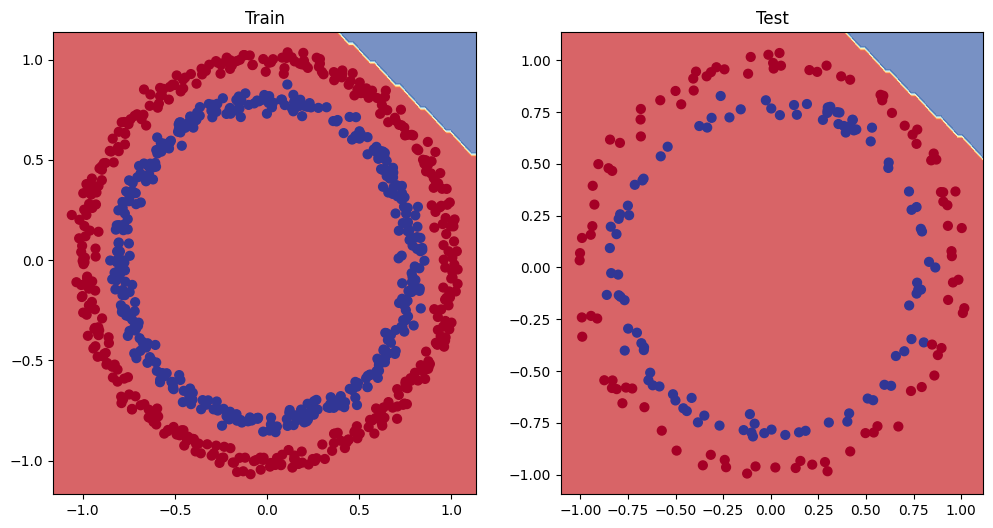

In [97]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

In [98]:
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=2, out_features=10)
    self.layer2 = nn.Linear(in_features=10, out_features=10)
    self.layer3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [99]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(), lr=0.1)

In [100]:
torch.manual_seed(42)
epochs = 10000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_3.train()
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  y_acc = accuracy_fn(y_train, y_pred)
  loss = loss_fn(y_logits, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_test, test_pred)

  if epoch % 1000 == 0:
    print(f'Epoch: {epoch} | Loss: {loss: .5f} | Acc: {y_acc: .2f}% | Test Loss: {test_loss: .5f} | Test acc: {test_acc: .2f}%')


Epoch: 0 | Loss:  0.69295 | Acc:  50.00% | Test Loss:  0.69319 | Test acc:  50.00%
Epoch: 1000 | Loss:  0.56818 | Acc:  87.75% | Test Loss:  0.57378 | Test acc:  86.50%
Epoch: 2000 | Loss:  0.04176 | Acc:  99.88% | Test Loss:  0.06583 | Test acc:  100.00%
Epoch: 3000 | Loss:  0.01672 | Acc:  99.88% | Test Loss:  0.03363 | Test acc:  100.00%
Epoch: 4000 | Loss:  0.01048 | Acc:  100.00% | Test Loss:  0.02451 | Test acc:  99.50%
Epoch: 5000 | Loss:  0.00765 | Acc:  100.00% | Test Loss:  0.01993 | Test acc:  99.50%
Epoch: 6000 | Loss:  0.00603 | Acc:  100.00% | Test Loss:  0.01726 | Test acc:  99.50%
Epoch: 7000 | Loss:  0.00499 | Acc:  100.00% | Test Loss:  0.01557 | Test acc:  99.50%
Epoch: 8000 | Loss:  0.00428 | Acc:  100.00% | Test Loss:  0.01451 | Test acc:  99.50%
Epoch: 9000 | Loss:  0.00375 | Acc:  100.00% | Test Loss:  0.01374 | Test acc:  99.50%


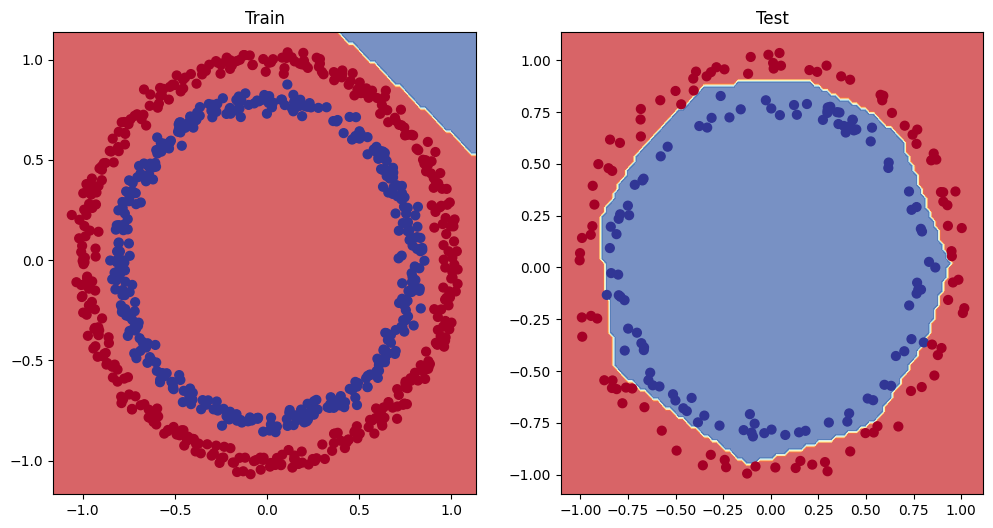

In [101]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity